<a href="https://colab.research.google.com/github/adfhsjt/PCVK25_3F_02/blob/main/Week6_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D. PRAKTIKUM FILTER

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [51]:
def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    output_height = math.floor(((image_height - kernel_height + 2 * padding) / stride) + 1)
    output_width = math.floor(((image_width - kernel_width + 2 * padding) / stride) + 1)

    output = np.zeros((output_height, output_width))

    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    for y_out in range(output_height):
        for x_out in range(output_width):

            y_start = y_out * stride
            x_start = x_out * stride

            image_slice = padded_image[y_start : y_start + kernel_height, x_start : x_start + kernel_width]

            output[y_out, x_out] = np.sum(image_slice * kernel)

    return output

In [49]:
img= cv.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/mandrill.tiff')
img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)

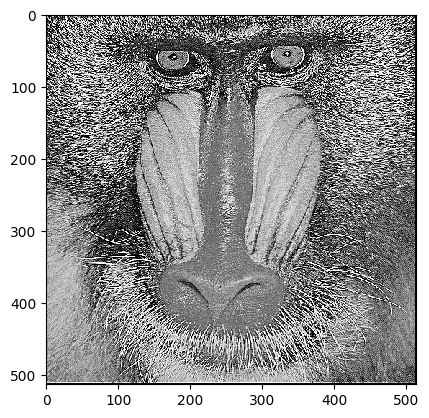

In [60]:
kernel_sharpen= np.array([[0,-1,0],
                         [-1,5,-1],
                         [0,-1,0]])

convolved_img = convolution2d(img_gray,kernel_sharpen,1,2)
plt.imshow(convolved_img, cmap='gray', vmin=0, vmax=255, interpolation='nearest')

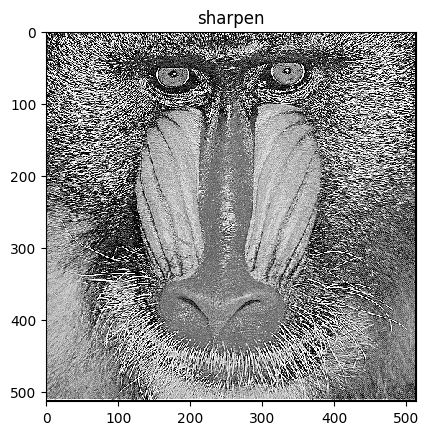

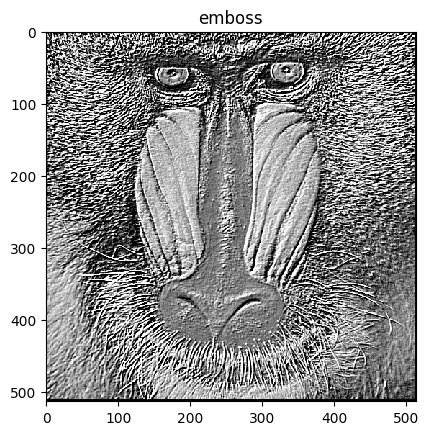

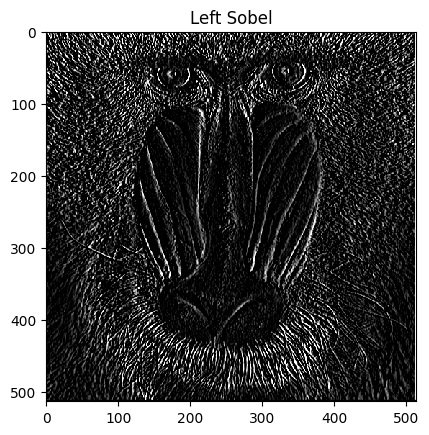

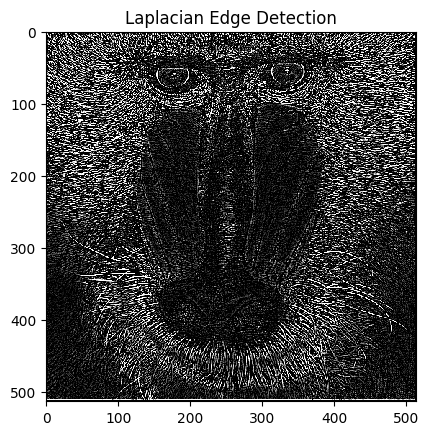

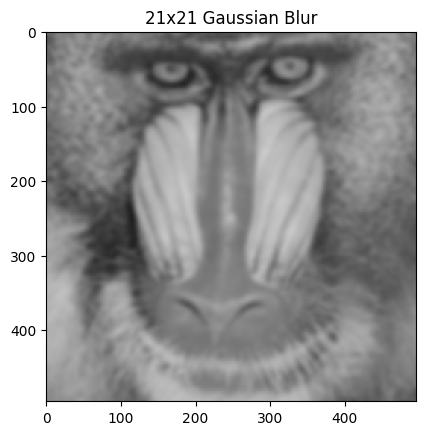

In [61]:
kernels = {}

kernels['sharpen'] = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])

kernels['emboss'] = np.array([[-2, -1, 0],
                              [-1, 1, 1],
                              [0, 1, 2]])

kernels['Left Sobel'] = np.array([[1, 0, -1],
                                  [2, 0, -2],
                                  [1, 0, -1]])

kernels['Laplacian Edge Detection'] = np.array([[-1, -1, -1],
                                                [-1, 8, -1],
                                                [-1, -1, -1]])

kernel_size = 21

sigma = 0

gaussian_kernel_1d = cv.getGaussianKernel(kernel_size, sigma)

gaussian_kernel_2d = gaussian_kernel_1d @ gaussian_kernel_1d.transpose()

kernels['21x21 Gaussian Blur'] = gaussian_kernel_2d

for kernel_name, kernel in kernels.items():
    convolved_img = convolution2d(img_gray, kernel, 1, 2)
    plt.figure()
    plt.title(kernel_name)
    plt.imshow(convolved_img, cmap='gray', vmin=0, vmax=255, interpolation='nearest')

plt.show()

